In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("Housing_Price.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### No. of Rows and No. of columns

In [3]:
print("No. of rows = ", df.shape[0])
print("No. of columns = ", df.shape[1])

No. of rows =  1460
No. of columns =  81


### Information about data types of each column

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Rows having all missing values

In [5]:
# Row indexes of empty rows
print("Row indexes of empty rows : ", df[df.isnull().all(axis =1)].index.tolist())

Row indexes of empty rows :  []


In [6]:
#Checking the missing values in data set
df.isnull().values.any()

True

### Columns having missing values

In [7]:
print('Columns having missing values are as follows:')
for i in df.isnull().any().index:
    if (df.isnull().any()[i]):
        print(i)

Columns having missing values are as follows:
LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


### Number of missing values and their percentage in each column

In [8]:
print("Number of missing values in each column:")
print(df.isnull().sum())
print('\nPercentage of missing values in each column:')
print(round(100*df.isnull().sum()/len(df.index)),2)

Number of missing values in each column:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Percentage of missing values in each column:
Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      18.0
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 81, dtype: float64 2


In [9]:
#Seeing the NaN values in ratio
print('\nPercentage of missing values in each column:')
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).head(20)


Percentage of missing values in each column:


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

In [10]:
# Removing columns having more than 30% missing values
df = df.drop('PoolQC', axis=1)
df = df.drop('MiscFeature', axis=1)
df= df.drop('Alley', axis=1)
df = df.drop('Fence',axis=1)
df = df.drop('FireplaceQu',axis=1)

### Rows with missing values

In [11]:
print("Row indexes of rows containing missing values: ", df[df.isnull().any(axis = 1)].index.tolist())

Row indexes of rows containing missing values:  [7, 12, 14, 16, 17, 24, 31, 39, 42, 43, 48, 50, 64, 66, 76, 78, 84, 88, 89, 90, 95, 99, 100, 102, 104, 108, 111, 113, 116, 120, 125, 126, 127, 131, 133, 136, 140, 147, 148, 149, 152, 153, 155, 156, 160, 163, 165, 166, 169, 170, 177, 180, 182, 186, 191, 198, 203, 207, 208, 210, 214, 218, 221, 234, 237, 241, 244, 249, 250, 259, 269, 287, 288, 291, 293, 307, 308, 310, 319, 328, 330, 332, 335, 342, 346, 347, 351, 356, 360, 361, 362, 364, 366, 369, 370, 371, 375, 384, 386, 392, 393, 404, 405, 412, 421, 426, 431, 434, 441, 447, 452, 457, 458, 459, 464, 465, 470, 484, 490, 495, 496, 516, 518, 520, 528, 529, 532, 533, 535, 537, 538, 539, 541, 545, 553, 559, 560, 562, 564, 569, 580, 582, 593, 610, 611, 612, 613, 614, 616, 620, 623, 626, 635, 636, 638, 641, 645, 646, 649, 650, 660, 666, 668, 672, 679, 682, 685, 687, 690, 705, 706, 709, 710, 714, 720, 721, 726, 734, 736, 738, 745, 746, 749, 750, 751, 757, 770, 778, 783, 784, 785, 789, 791, 794, 811,

### Number of missing values and their percentage in each row

In [12]:
print(pd.DataFrame.from_dict({'Rows' : df.isnull().any(axis = 1), 
                              'Number of missing values' : df.isnull().sum(axis = 1), 
                              'Percentage of missing values' : round(100*df.isnull().sum(axis = 1)/df.shape[1])}))

       Rows  Number of missing values  Percentage of missing values
0     False                         0                           0.0
1     False                         0                           0.0
2     False                         0                           0.0
3     False                         0                           0.0
4     False                         0                           0.0
...     ...                       ...                           ...
1455  False                         0                           0.0
1456  False                         0                           0.0
1457  False                         0                           0.0
1458  False                         0                           0.0
1459  False                         0                           0.0

[1460 rows x 3 columns]


### Number and percentage of rows having more than 5 missing values

In [13]:
# count the number of rows having > 5 missing values
print("Number of rows having more than 5 missing values : ", len(df[df.isnull().sum(axis=1) > 5].index))
print("Number of rows having more than 5 missing values : ", 100*(len(df[df.isnull().sum(axis=1) > 5].index) / len(df.index)))

Number of rows having more than 5 missing values :  20
Number of rows having more than 5 missing values :  1.36986301369863


### since the percentahe of such rows is less than 20%. Therefore, removing all such rows

In [14]:
# retaining the rows having <= 5 NaNs
df = df[df.isnull().sum(axis=1) <= 5]

### Description of data

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1440.0,730.111111,421.870004,1.0,364.75,730.5,1095.25,1460.0
MSSubClass,1440.0,56.826389,42.016548,20.0,20.00,50.0,70.00,190.0
LotFrontage,1194.0,70.084590,24.339910,21.0,59.00,69.5,80.00,313.0
LotArea,1440.0,10542.294444,10043.775272,1300.0,7560.00,9500.0,11618.25,215245.0
OverallQual,1440.0,6.128472,1.361955,2.0,5.00,6.0,7.00,10.0
OverallCond,1440.0,5.584028,1.101466,2.0,5.00,5.0,6.00,9.0
YearBuilt,1440.0,1971.613194,30.179237,1872.0,1954.00,1973.0,2001.00,2010.0
YearRemodAdd,1440.0,1985.207639,20.504324,1950.0,1967.75,1994.0,2004.00,2010.0
MasVnrArea,1432.0,104.895950,181.823951,0.0,0.00,0.0,168.00,1600.0
BsmtFinSF1,1440.0,448.313194,456.897567,0.0,0.00,387.5,719.00,5644.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1440 non-null   int64  
 1   MSSubClass     1440 non-null   int64  
 2   MSZoning       1440 non-null   object 
 3   LotFrontage    1194 non-null   float64
 4   LotArea        1440 non-null   int64  
 5   Street         1440 non-null   object 
 6   LotShape       1440 non-null   object 
 7   LandContour    1440 non-null   object 
 8   Utilities      1440 non-null   object 
 9   LotConfig      1440 non-null   object 
 10  LandSlope      1440 non-null   object 
 11  Neighborhood   1440 non-null   object 
 12  Condition1     1440 non-null   object 
 13  Condition2     1440 non-null   object 
 14  BldgType       1440 non-null   object 
 15  HouseStyle     1440 non-null   object 
 16  OverallQual    1440 non-null   int64  
 17  OverallCond    1440 non-null   int64  
 18  YearBuil

### Percentage of missing values in each column

In [17]:
print(round(100*(df.isnull().sum()/len(df.index)), 2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.08
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 76, dtype: float64


In [18]:
#Percentage of missing values in each column
print(round(100*(df.isnull().sum()/len(df.index)), 2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.08
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 76, dtype: float64


In [19]:
df['LotFrontage'].describe()

count    1194.00000
mean       70.08459
std        24.33991
min        21.00000
25%        59.00000
50%        69.50000
75%        80.00000
max       313.00000
Name: LotFrontage, dtype: float64

In [20]:
df['LotFrontage'].describe(percentiles = [0.9, 0.95, 0.99])

count    1194.00000
mean       70.08459
std        24.33991
min        21.00000
50%        69.50000
90%        96.00000
95%       107.00000
99%       141.21000
max       313.00000
Name: LotFrontage, dtype: float64

In [21]:
#Removing the Outliers
threshold=3
df = df[ np.abs(df['LotFrontage'] - df['LotFrontage'].mean()) / df['LotFrontage'].std() < threshold]

In [22]:
df['LotFrontage'].describe(percentiles = [0.9, 0.95, 0.99])

count    1182.000000
mean       68.907783
std        20.651148
min        21.000000
50%        69.000000
90%        94.000000
95%       104.950000
99%       124.760000
max       141.000000
Name: LotFrontage, dtype: float64

In [23]:
#Imputing the missing values
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)

#Now lets check the Percentage of missing values in each column again
print(round(100*(df.isnull().sum()/len(df.index)), 2))

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 76, dtype: float64


### Filling Missing value

In [25]:
#Filling the Object Columns with mode.
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
            'BsmtFinType1','BsmtFinType2','Electrical']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [27]:
#Filling the Numeric columns with mean.
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

### Now since all the data cleaning steps have been done. let us check the missing values in whole dataframe

In [28]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

### Number and percentage of rows removed

In [30]:
print("No. of Rows left = ", df.shape[0])
print("No. of Rows removed = ", 1460 - df.shape[0])
print("Percentage of Rows removed = {}%".format(round(100*(1460 - df.shape[0])/1460,2)))

No. of Rows left =  1182
No. of Rows removed =  278
Percentage of Rows removed = 19.04%


### Summary Statistics

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1182.0,725.291878,421.095067,1.0,364.50,719.500000,1088.75,1460.0
MSSubClass,1182.0,57.072758,43.003965,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1182.0,68.907783,20.651148,21.0,59.00,69.000000,80.00,141.0
LotArea,1182.0,9686.238579,4968.535550,1300.0,7420.00,9245.500000,11209.25,70761.0
OverallQual,1182.0,6.124365,1.401801,2.0,5.00,6.000000,7.00,10.0
OverallCond,1182.0,5.568528,1.094962,2.0,5.00,5.000000,6.00,9.0
YearBuilt,1182.0,1970.694585,31.727015,1872.0,1950.00,1972.000000,2003.00,2010.0
YearRemodAdd,1182.0,1985.239425,21.146624,1950.0,1966.00,1995.000000,2004.00,2010.0
MasVnrArea,1182.0,103.255952,184.543609,0.0,0.00,0.000000,160.00,1600.0
BsmtFinSF1,1182.0,421.946701,436.018051,0.0,0.00,352.000000,690.00,2260.0


In [32]:
#Here we check the summary of object and datetime columns
df.describe(include=['object','datetime']).transpose()

,count,unique,top,freq
MSZoning,1182,5,RL,906
Street,1182,2,Pave,1177
LotShape,1182,4,Reg,842
LandContour,1182,4,Lvl,1070
Utilities,1182,1,AllPub,1182
LotConfig,1182,5,Inside,906
LandSlope,1182,3,Gtl,1134
Neighborhood,1182,25,NAmes,184
Condition1,1182,9,Norm,1022
Condition2,1182,6,Norm,1169


In [33]:
#Printing the object data types and their unique values

for column in df.columns:
    if df[column].dtype==object:
        print(str(column) + ' : ' + str(df[column].nunique()))
        print(df[column].value_counts())
        print('******************************************************************************')

MSZoning : 5
RL         906
RM         196
FV          57
RH          13
C (all)     10
Name: MSZoning, dtype: int64
******************************************************************************
Street : 2
Pave    1177
Grvl       5
Name: Street, dtype: int64
******************************************************************************
LotShape : 4
Reg    842
IR1    313
IR2     24
IR3      3
Name: LotShape, dtype: int64
******************************************************************************
LandContour : 4
Lvl    1070
Bnk      53
HLS      44
Low      15
Name: LandContour, dtype: int64
******************************************************************************
Utilities : 1
AllPub    1182
Name: Utilities, dtype: int64
******************************************************************************
LotConfig : 5
Inside     906
Corner     195
CulDSac     44
FR2         33
FR3          4
Name: LotConfig, dtype: int64
****************************************************************

In [35]:

#Printing the numeric columns and their unique values

print('*********Float64 columns unique values*********************')
print('\n')
for column in df.columns:
    if df[column].dtypes == np.number:
        print(str(column)+ ' : ' +str(df[column].nunique()))
        print('*****************************')
print('\n')
print('*********Int64 columns unique values*********************')
print('\n')
for column in df.columns:
    if df[column].dtypes == 'int64':
        print(str(column)+ ' : ' +str(df[column].nunique()))
        print('*****************************')

*********Float64 columns unique values*********************


LotFrontage : 100
*****************************
MasVnrArea : 281
*****************************
GarageYrBlt : 98
*****************************


*********Int64 columns unique values*********************


Id : 1182
*****************************
MSSubClass : 15
*****************************
LotArea : 853
*****************************
OverallQual : 9
*****************************
OverallCond : 8
*****************************
YearBuilt : 112
*****************************
YearRemodAdd : 61
*****************************
BsmtFinSF1 : 533
*****************************
BsmtFinSF2 : 108
*****************************
BsmtUnfSF : 697
*****************************
TotalBsmtSF : 637
*****************************
1stFlrSF : 669
*****************************
2ndFlrSF : 363
*****************************
LowQualFinSF : 21
*****************************
GrLivArea : 750
*****************************
BsmtFullBath : 4
*****************************

In [36]:
#Check correlation 
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.013851,-0.041051,-0.041351,-0.044866,0.007233,-0.016846,-0.026388,-0.070006,-0.025545,...,-0.027570,0.002021,0.021380,-0.064609,0.015742,0.044897,0.039074,0.007987,0.003827,-0.038871
MSSubClass,0.013851,1.000000,-0.448373,-0.295479,0.013489,-0.059393,0.005826,0.010017,0.028940,-0.069412,...,-0.023510,-0.006214,-0.026520,-0.039940,-0.026408,-0.006234,-0.044496,-0.027710,-0.016372,-0.096842
LotFrontage,-0.041051,-0.448373,1.000000,0.485492,0.240331,-0.062836,0.131692,0.070393,0.207439,0.142404,...,0.109107,0.137021,-0.019643,0.089080,0.064069,0.021968,0.012569,0.013607,0.007418,0.370844
LotArea,-0.041351,-0.295479,0.485492,1.000000,0.233837,-0.040429,0.075660,0.069851,0.174274,0.212150,...,0.247067,0.138969,-0.055037,0.029576,0.139130,0.023455,0.030100,0.031422,-0.045756,0.412320
OverallQual,-0.044866,0.013489,0.240331,0.233837,1.000000,-0.137678,0.589509,0.558854,0.429367,0.244241,...,0.283441,0.329541,-0.169893,0.023495,0.069937,0.006217,-0.058993,0.080397,-0.026317,0.808843
OverallCond,0.007233,-0.059393,-0.062836,-0.040429,-0.137678,1.000000,-0.409010,0.052041,-0.163947,-0.049231,...,-0.018434,-0.060944,0.076445,-0.007259,0.080682,0.006137,0.103478,-0.020666,0.033189,-0.118056
YearBuilt,-0.016846,0.005826,0.131692,0.075660,0.589509,-0.409010,1.000000,0.599783,0.340952,0.261206,...,0.242057,0.204174,-0.405563,0.031981,-0.047011,0.008693,-0.087907,0.014789,-0.017381,0.547959
YearRemodAdd,-0.026388,0.010017,0.070393,0.069851,0.558854,0.052041,0.599783,1.000000,0.193916,0.126665,...,0.233171,0.244385,-0.213666,0.027761,-0.027446,0.000564,-0.040762,0.023678,0.032422,0.525795
MasVnrArea,-0.070006,0.028940,0.207439,0.174274,0.429367,-0.163947,0.340952,0.193916,1.000000,0.276659,...,0.179582,0.110283,-0.128420,0.025431,0.060222,-0.003176,-0.052331,0.023449,-0.025248,0.513157
BsmtFinSF1,-0.025545,-0.069412,0.142404,0.212150,0.244241,-0.049231,0.261206,0.126665,0.276659,1.000000,...,0.218211,0.086985,-0.125537,0.026966,0.072486,0.026773,0.006749,0.003658,0.001474,0.411231


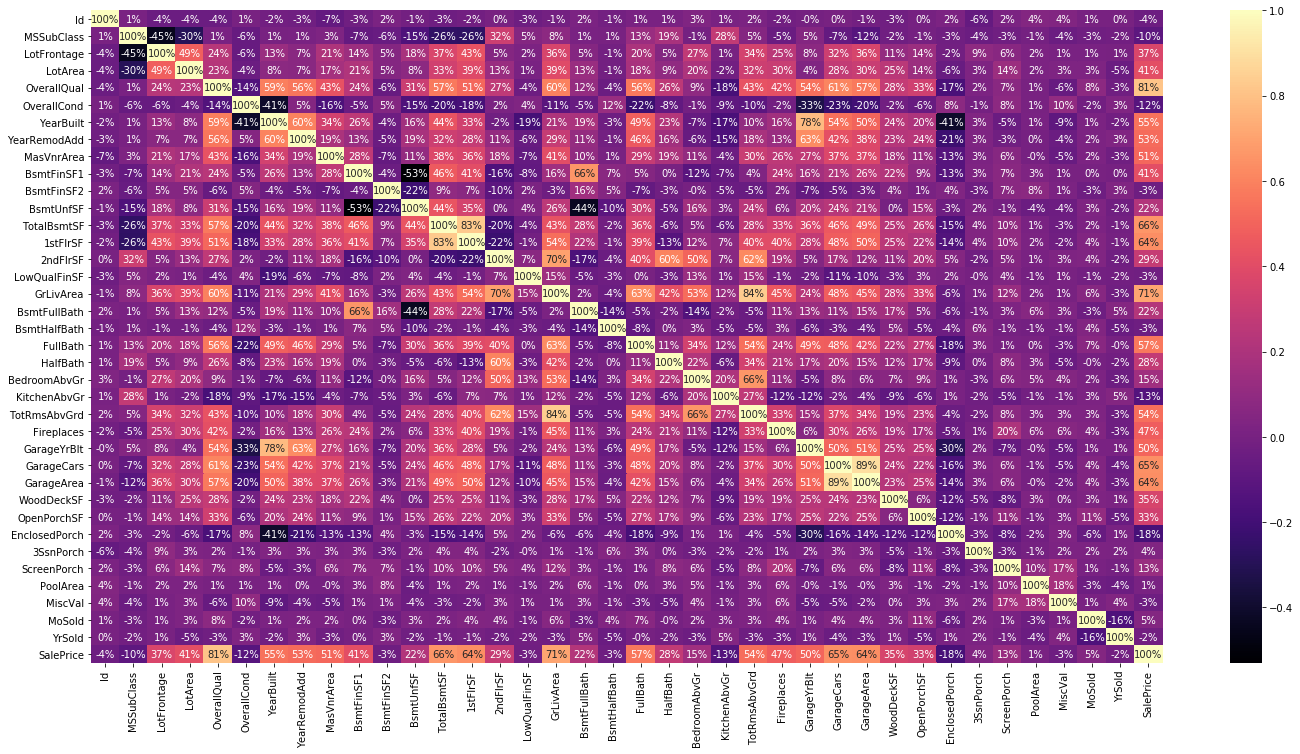

In [37]:
#Seeing the correlation via visualization
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(),annot=True,fmt='.0%',cmap='magma')
plt.show()

In [38]:
#lets drop unwanterd columns
df.drop(columns=['Id'], axis=1, inplace=True)

## Model Training

In [40]:
#Splitting the data into input and output variable.
x=df.drop(columns=['SalePrice'],axis=1)
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [41]:
y=df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [42]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(1182, 74) 		 (1182,)


In [43]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [44]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(886, 74) 		 (296, 74)


In [45]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(886,) 	 (296,)


In [46]:
#Importing all the model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score